In [88]:
import pandas as pd
import os; os.getcwd()
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [44]:
# Load pandas from zip
df = pd.read_stata("data/full_panel.zip")
df.columns
# outcomes

# 


/usr/lib/python3.9/site-packages/pandas/io/stata.py:1457: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


Index(['holder_id', 'household_id', 'ea_id', 'rural', 'pw', 'parcel_id',
       'field_id', 'region', 'zone', 'woreda',
       ...
       'h2015_grn', 'h2015_sen', 'hhd_psnp', 'hhm_psnp', 'hh_dpsnp',
       'hh_dpsnppc', 'hh_ipsnp', 'hh_dwpsnp', 'hhea_psnp', 'flivman'],
      dtype='object', length=285)

## Create Map of Households

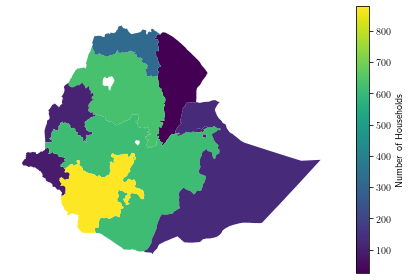

In [89]:
map = gpd.read_file("data/ethiopiaworeda/Eth_Woreda_2013.shp").replace({'REGIONNAME' : {'Beneshangul Gumu' : 'Benishangul Gumuz',
                                                                                       'Hareri' : 'Harari',
                                                                                       'SNNPR' : 'SNNP',
                                                                                       'Oromia' : 'Oromiya',
                                                                                       'Somali' : 'Somalie',
                                                                                       'Gambela' : 'Gambella'}})

# Get number of households per region
hhids = df.drop_duplicates(['household_id', 'wave']).groupby(['region', 'wave'])['household_id'].count().groupby('region').mean().astype(int)

fig, ax = plt.subplots()

ax.set_axis_off()

with mpl.rc_context(rc={'text.usetex': True}):
    map.dissolve('REGIONNAME').merge(hhids, left_index=True, right_on = ['region']).plot('household_id', 
                                                                                        legend=True, 
                                                                                        ax=ax, 
                                                                                        legend_kwds={'label' : 'Number of Households'},
                                                                                        missing_kwds={'color': 'lightgrey'})

    plt.tight_layout()

    plt.savefig("results/figures/map_hhids.pdf", format='pdf', dpi=160)

## Create Summary Table

In [52]:

df['region'].unique()

['Tigray', 'Afar', 'Amhara', 'Oromiya', 'Somalie', 'Benishangul Gumuz', 'SNNP', 'Gambella', 'Harari', 'Dire Dawa']
Categories (10, object): ['Tigray' < 'Afar' < 'Amhara' < 'Oromiya' ... 'SNNP' < 'Gambella' < 'Harari' < 'Dire Dawa']